Dołączanie wymaganych bibliotek

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Wspólne dane i funkcje

In [12]:
samples = list(range(1900, 1990, 10))
population = np.array([76_212_168, 92_228_496, 106_021_537, 123_202_624, 132_164_569, 151_325_798, 179_323_175, 203_302_031, 226_542_199])
x_values = np.arange(1900, 1991)

phiA = lambda j, t: t**j
phiB = lambda j, t: (t-1900)**j
phiC = lambda j, t: (t-1940)**j
phiD = lambda j, t: ((t-1940)/40)**j

def display_results(X, Y, title, round_real = False):
    # Rysujemy wykres
    plt.plot(X, Y, label="Wielomian interpolacyjny", color="blue")
    plt.plot(samples, population, 'ro', label="Węzły interpolacji")
    plt.xlabel("Rok")
    plt.ylabel("Populacja")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    # Odczytujemy ekstrapolowaną wartość i mierzymy jej błąd względny
    extrapolate_value = Y[90]
    real_value = 248_709_873
    if round_real:
        real_value = round(real_value, -6)
    rel_error = abs(extrapolate_value - real_value) / real_value
    print(f"Wartość prawdziwa: {real_value:.0f}\nWartość ekstrapolowana: {extrapolate_value:.0f}, błąd względny: {rel_error:.2f}")

**Rozwiązania podpunktów**

In [13]:
# a)
n = len(samples) # n = 9
vandA, vandB, vandC, vandD = [
    [
        [float(phi(k, samples[i])) for k in range(n)]
        for i in range(n)
    ]
    for phi in [phiA, phiB, phiC, phiD]
]

In [14]:
# b)
condA, condB, condC, condD = [np.linalg.cond(vand) for vand in [vandA, vandB, vandC, vandD]]

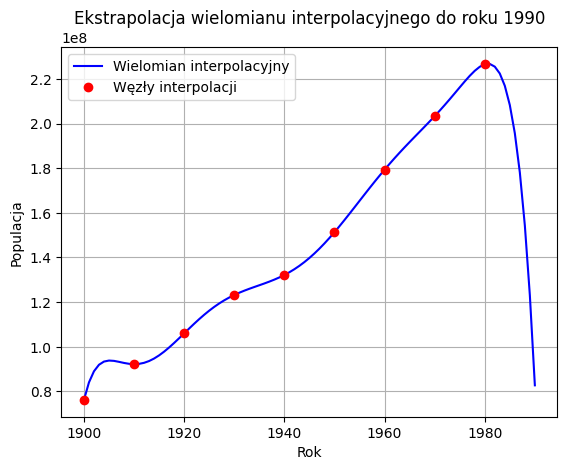

Wartość prawdziwa: 248709873
Wartość ekstrapolowana: 82749141, błąd względny: 0.67


In [15]:
# c) i d)
# Macierz Vandermonde'a o minimalnym wskaźniku uwarunkowania
vand = min((condA, vandA, phiA), (condB, vandB, phiB), (condC, vandC, phiC), (condD, vandD, phiD))
polynomial = np.linalg.solve(vand[1], population)   # vand * vec = population
phi = vand[2]

# Funkcja do ewaluacji wielomianu metodą Hornera
def horner(v, coeff):
    result = coeff[0]
    for c in coeff[1:]:
        result = result * v + c
    return result

v_eval = phi(1, x_values)
# Aby użyć schematu Hornera, współczynniki muszą być uporządkowane od najwyższej potęgi
a_horner = polynomial[::-1]  # odwracamy kolejność
y_eval = np.array([horner(v, a_horner) for v in v_eval])
display_results(x_values, y_eval, "Ekstrapolacja wielomianu interpolacyjnego do roku 1990")

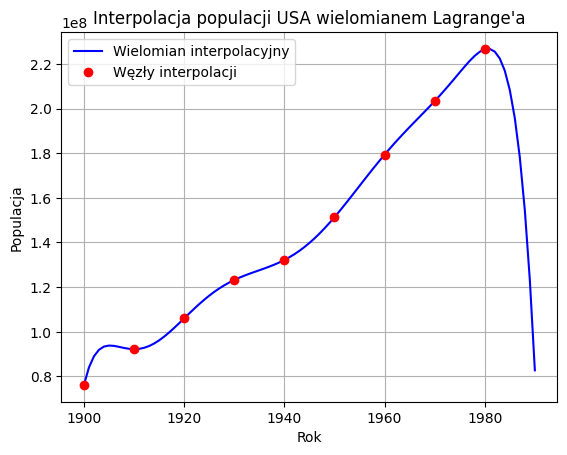

Wartość prawdziwa: 248709873
Wartość ekstrapolowana: 82749141, błąd względny: 0.67


In [16]:
# e)
# Funkcja obliczająca wielomian interpolacyjny Lagrange'a
def lagrange_interpolation(x, y, t):
    n = len(x)
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (t - x[j]) / (x[i] - x[j])
        result += term
    return result

p_lagrange_eval = np.array([lagrange_interpolation(samples, population, t) for t in x_values])
display_results(x_values, p_lagrange_eval, "Interpolacja populacji USA wielomianem Lagrange'a")

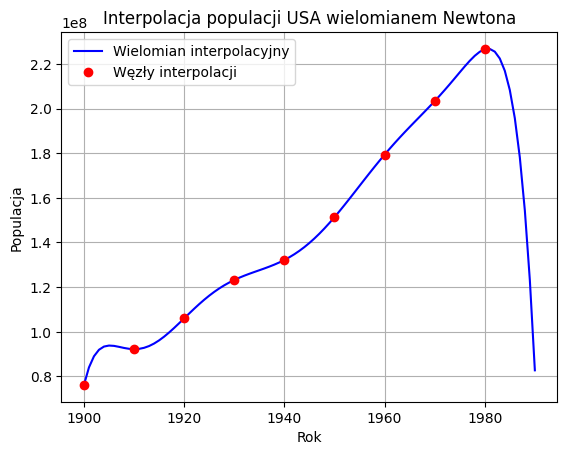

Wartość prawdziwa: 248709873
Wartość ekstrapolowana: 82749141, błąd względny: 0.67


In [17]:
# f)
def newton_divided_differences(x, y):
    # Oblicza współczynniki wielomianu Newtona metodą dzielonych różnic
    n = len(x)
    a = np.array(y, dtype=float)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

def newton_interpolation(x, coeff, t):
    # Funkcja obliczająca wielomian interpolacyjny Newtona
    n = len(x)
    result = coeff[n-1]
    for i in range(n-2, -1, -1):
        result = result * (t - x[i]) + coeff[i]
    return result

coeff_newton = newton_divided_differences(samples, population)
p_newton_eval = np.array([newton_interpolation(samples, coeff_newton, t) for t in x_values])
display_results(x_values, p_newton_eval, "Interpolacja populacji USA wielomianem Newtona")

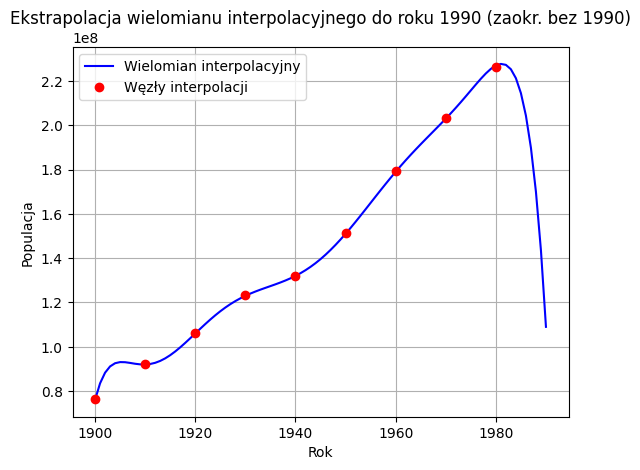

Wartość prawdziwa: 248709873
Wartość ekstrapolowana: 109000000, błąd względny: 0.56


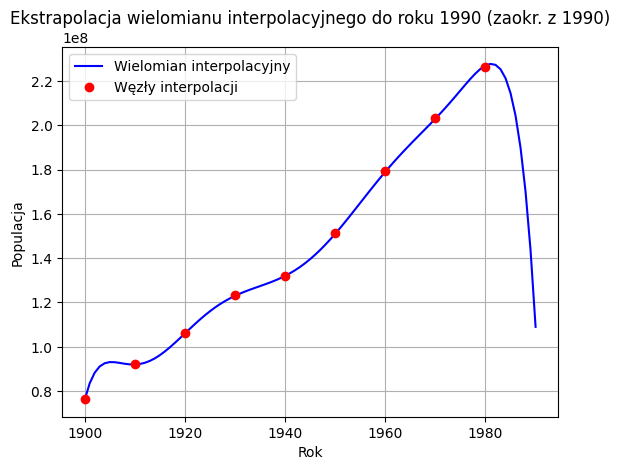

Wartość prawdziwa: 249000000
Wartość ekstrapolowana: 109000000, błąd względny: 0.56


In [18]:
# g)
rounded_population = [round(single_population, -6) for single_population in population]
rounded_polynomial = np.linalg.solve(vand[1], rounded_population)   # vand * vec = population
phi = vand[2]

rounded_v_eval = phi(1, x_values)
# Aby użyć schematu Hornera, współczynniki muszą być uporządkowane od najwyższej potęgi
rounded_a_horner = rounded_polynomial[::-1]  # odwracamy kolejność
rounded_y_eval = np.array([horner(v, rounded_a_horner) for v in rounded_v_eval])
display_results(x_values, rounded_y_eval, "Ekstrapolacja wielomianu interpolacyjnego do roku 1990 (zaokr. bez 1990)")
display_results(x_values, rounded_y_eval, "Ekstrapolacja wielomianu interpolacyjnego do roku 1990 (zaokr. z 1990)", True)